In [1]:
%store -r pdict

In [16]:
%store -r asmbly_name

In [17]:
cd GLOOME_run_15166493377981/

[Errno 2] No such file or directory: 'GLOOME_run_15166493377981/'
/Users/aug/workspace/trees/sRNAs/ecoli/GLOOME_run_15166493377981


In [3]:
pdict['216597.6'] = 'Salmonella enterica subsp. enterica serovar Typhimurium str. SL1344'
pdict['511145.12'] = 'Escherichia coli str. K-12 substr. MG1655'
pdict['243277.26'] = 'Vibrio'

In [25]:
from ete3 import Tree, TreeStyle, Tree, TextFace, add_face_to_node, faces
import pandas as pd

In [26]:
ts = TreeStyle()
ts.show_leaf_name = False

In [27]:
def mylayout(node):
    if not node.is_leaf():
        F = TextFace(node.name, tight_text = True)
        add_face_to_node(F, node, column=0, position='branch-right')
    if node.is_leaf():
        F = TextFace(node.org, tight_text = True)
        add_face_to_node(F, node, column=0, position='branch-right')

In [28]:
t = Tree('Tree_with_inner_nodes_notation.ph', format=1)

In [34]:
for node in t.traverse():
    if node.name in asmbly_name:
        node.add_features(org=asmbly_name[node.name])

In [35]:
ts.layout_fn = mylayout

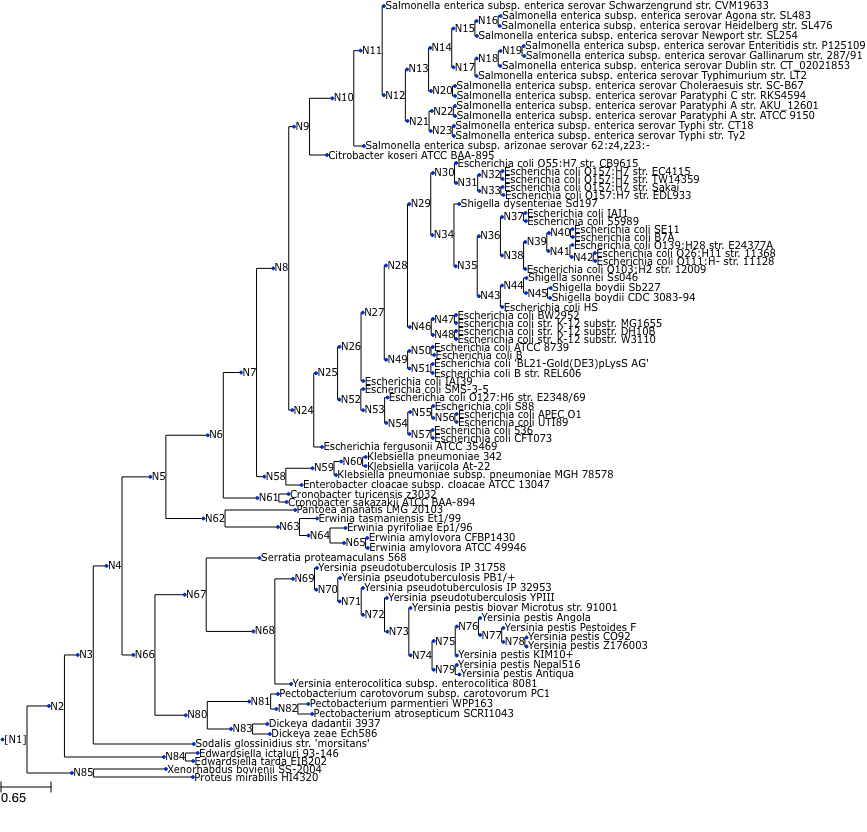

In [36]:
t.render('%%inline', tree_style=ts)

In [37]:
df = pd.read_table('Ancestral_reconstuction_of_states_per_position_per_node.txt')

In [38]:
df

,POS,Node,State,Prob
0,1,GCF_000020745.1,1,0.000000e+00
1,1,GCF_000020885.1,1,0.000000e+00
2,1,GCF_000020705.1,1,0.000000e+00
3,1,N16,1,5.808000e-06
4,1,GCF_000016045.1,1,0.000000e+00
5,1,N15,1,2.658000e-06
6,1,GCF_000009505.1,1,0.000000e+00
7,1,GCF_000009525.1,1,0.000000e+00
8,1,N19,1,1.963000e-05
9,1,GCF_000020925.1,1,0.000000e+00


#### Only include those nodes ancestral to hub strain

In [39]:
loi = t.get_leaves_by_name('GCF_000005845.2')[0].get_ancestors()
l = [i.name for i in loi]
ndf = df[df.Node.isin(l)]

#### Make all node positions numeric

In [40]:
def make_num(val):
    if val.startswith('N'):
        n = val.split('N')[1]
    elif val.startswith('['):
        n = 1
    return n

In [41]:
ndf['Node'] = ndf['Node'].apply(make_num)

/Users/aug/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Determine the most probable gain node for each sRNA (POS)

In [42]:
gnd = dict()

In [43]:
ndf.dropna(subset=['Node'], inplace=True)

/Users/aug/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
for pos, data in ndf.groupby('POS'):
    gn = '999' 
    for i, row in data.sort_values(by=['Node'], ascending=False).iterrows():
        if row['Prob'] >= 0.70:
            gn = row['Node']
            continue
        else:
            break
    gnd[pos] = gn

In [49]:
gnd

{1: '999',
 2: '999',
 3: '999',
 4: '8',
 5: '999',
 6: '6',
 7: '2',
 8: '6',
 9: '999',
 10: '46',
 11: '8',
 12: '8',
 13: '8',
 14: '7',
 15: '999',
 16: '8',
 17: '6',
 18: '8',
 19: '7',
 20: '7',
 21: '999',
 22: '8',
 23: '999',
 24: '6',
 25: '8',
 26: '8',
 27: '999',
 28: '999',
 29: '7',
 30: '999',
 31: '6',
 32: '6',
 33: '6',
 34: '6',
 35: '999',
 36: '2',
 37: '2',
 38: '999',
 39: '4',
 40: '46',
 41: '4',
 42: '999',
 43: '6',
 44: '999',
 45: '999',
 46: '6',
 47: '7',
 48: '4',
 49: '8',
 50: '6',
 51: '999',
 52: '999',
 53: '7',
 54: '46',
 55: '7',
 56: '8',
 57: '6',
 58: '46',
 59: '2',
 60: '46',
 61: '999',
 62: '6',
 63: '7',
 64: '8',
 65: '2',
 66: '8',
 67: '2',
 68: '7',
 69: '999',
 70: '7',
 71: '8',
 72: '2',
 73: '6',
 74: '6',
 75: '8',
 76: '999',
 77: '2',
 78: '2',
 79: '999',
 80: '4',
 81: '7'}

### Add gain node frequency to the tree

In [50]:
gns = pd.Series(gnd).value_counts()

In [51]:
d = {'N' + k: v for k, v in gns.to_dict().items()}

In [52]:
for node in t.traverse():
    if node.name in d:
        node.add_features(gain=d[node.name])
    else:
        node.add_features(gain=0)

In [53]:
def gnlayout(node):
    if not node.is_leaf():
        F = TextFace(node.name, tight_text = True)
        add_face_to_node(F, node, column=0, position='branch-right')
        node.img_style["size"] += node.gain # Increase node sphere size by gain frequency
        if node.gain > 0:
            G = TextFace(node.gain, tight_text = True, fsize=14, bold=True, fgcolor='Green')
            add_face_to_node(G, node, column=0, position='branch-top')
    if node.is_leaf():
        F = TextFace(node.org, tight_text = True)
        add_face_to_node(F, node, column=0, position='branch-right')

In [54]:
node.img_style

{'bgcolor': '#FFFFFF',
 'draw_descendants': True,
 'faces_bgcolor': '#FFFFFF',
 'fgcolor': '#0030c1',
 'hz_line_color': '#000000',
 'hz_line_type': 0,
 'hz_line_width': 0,
 'node_bgcolor': '#FFFFFF',
 'shape': 'circle',
 'size': 3,
 'vt_line_color': '#000000',
 'vt_line_type': 0,
 'vt_line_width': 0}

In [55]:
ts.layout_fn = gnlayout

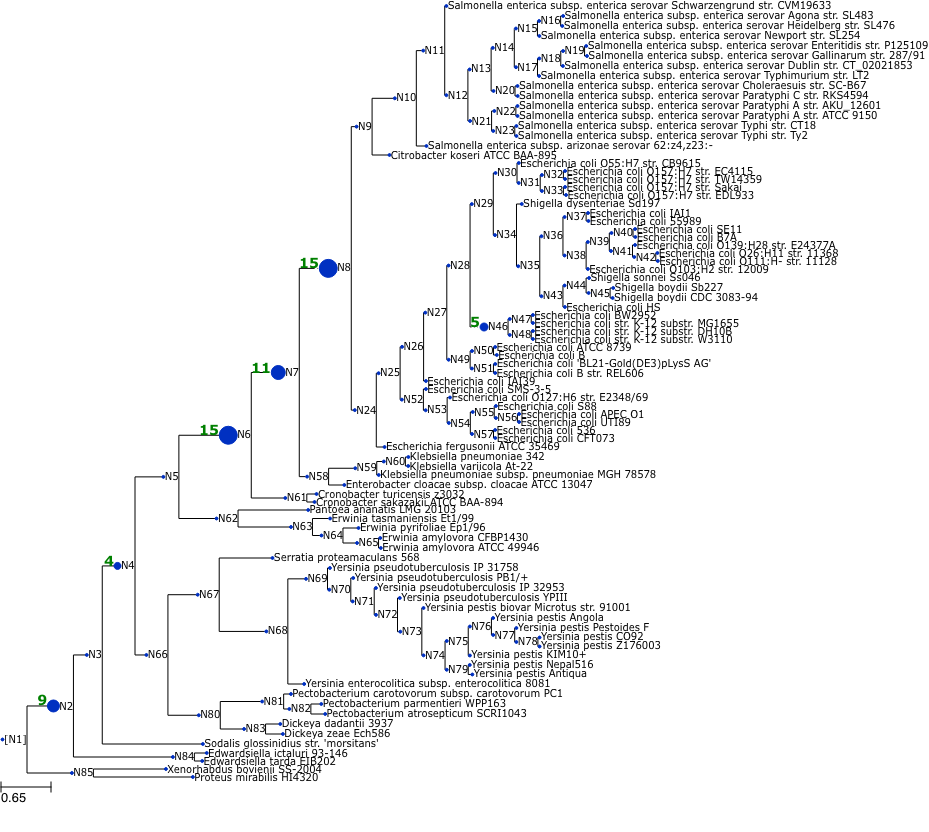

In [56]:
t.render('%%inline', tree_style=ts)

In [58]:
%store -r g

In [38]:
ecoli = t.search_nodes(name='N52')[0]

In [42]:
kids = [node.name for node in ecoli.get_descendants() if not node.name.startswith('N')]

In [44]:
%store kids

Stored 'kids' (list)


### Bin the sRNAs

In [59]:
g.columns

Index(['C0465_rf', 'Esr1_EC', 'Esr2_EC', 'Esr4_EC', 'Esr5_EC', 'Esr6_EC',
       'Esr8_EC', 'Esr9_EC', 'OrzO-P_rf', 'P26_rf', 'STnc130_rf', 'STnc180_rf',
       'STnc240_rf', 'STnc3000_ST', 'STnc3160_ST', 'STnc3390_ST',
       'STnc4080_ST', 'STnc410_rf', 'STnc4180_ST', 'STnc430_rf', 'STnc480_rf',
       'STnc520_ST', 'STnc740_ST', 'STnc880_ST', 'Tpke11_EC_rf', 'arcZ_EC_rf',
       'c0293_EC', 'c0299_EC', 'c0343_EC', 'c0719_EC', 'csrB_EC', 'csrC_EC_rf',
       'cyaR_EC_rf', 'dsrA_EC', 'eyeA_EC', 'ffs_EC', 'fnrS_EC_rf',
       'gadY_EC_rf', 'gcvB_EC', 'glmY_EC_rf', 'glmZ_EC_rf', 'is128_EC',
       'iscRS_rf', 'isrA_EC', 'isrC_EC', 'istR_EC_rf', 'mgrR_STnc560_EC_rf',
       'micA_EC_rf', 'micC_EC_rf', 'micF_EC_rf', 'ohsC_EC', 'ompn3_EC',
       'omrA_EC', 'omrB_EC', 'oxyS_EC', 'psrD_EC', 'psrN_EC',
       'psrO_SraG_EC_rf', 'rnpB_EC', 'rprA_EC_rf', 'rseX_EC_rf', 'rybB_EC',
       'rydB_EC_rf', 'rydC_EC', 'ryeB_EC_rf', 'ryfA_EC', 'ryhB_EC_rf',
       'ryjA_sraL_EC_rf', 'ryjB_EC', 'sRNA12_

In [60]:
s = {x:y for (x, y) in zip(range(1, 82), g.columns.tolist())}

In [61]:
sdf = pd.concat([pd.Series(gnd), pd.Series(s)], axis=1)

In [62]:
sdf = sdf.rename(columns={0: 'gain_node'})

In [63]:
sdf['gain_node'] = pd.to_numeric(sdf['gain_node'])

In [76]:
bins = [1, 6, 45, 999]
labels = ['old', 'teenage', 'baby']

In [77]:
sdf['age_bin'] = pd.cut(sdf['gain_node'], bins=bins, labels=labels)

In [78]:
sdf['age_bin'].value_counts()

old        28
baby       27
teenage    26
Name: age_bin, dtype: int64

In [79]:
blt = Tree('Tree_with_branch_length_by_gain.ph', format=1)

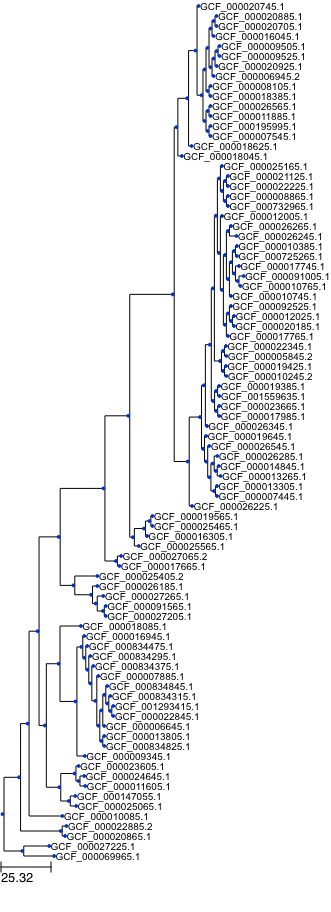

In [81]:
blt.render('%%inline')